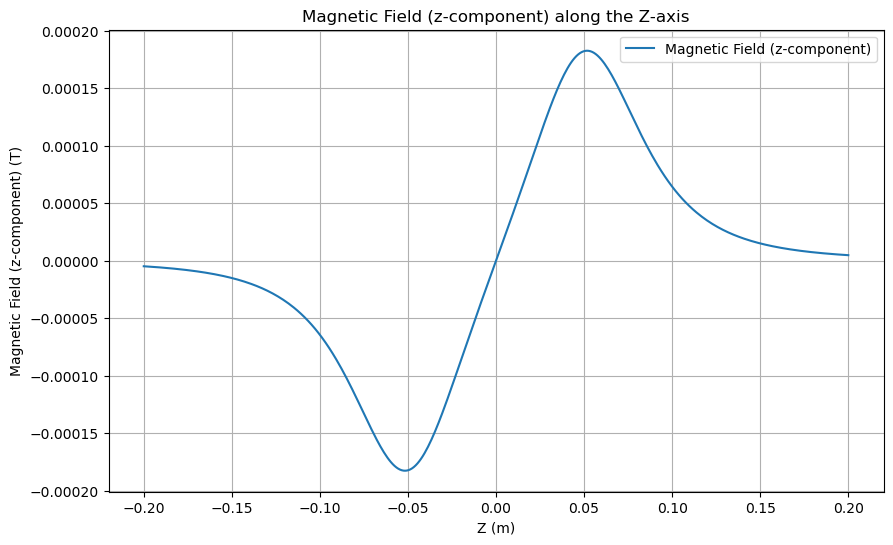

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

def magnetic_field_coil(x, y, z, coil_center, radius, current):
    n_points = 100
    theta = np.linspace(0, 2 * np.pi, n_points)

    coil_x = coil_center[0] + radius * np.cos(theta)
    coil_y = coil_center[1] + radius * np.sin(theta)
    coil_z = np.full_like(coil_x, coil_center[2])

    r_vecs = np.array([x - coil_x, y - coil_y, z - coil_z]).T
    distances = np.linalg.norm(r_vecs, axis=1)

    dL = np.array([-radius * np.sin(theta), radius * np.cos(theta), np.zeros(n_points)]).T
    dB = mu_0 * current / (4 * np.pi) * np.cross(dL, r_vecs) / distances[:, None] ** 3
    B = np.sum(dB, axis=0)
    return B

def ant_helmholtz_field(x, y, z, coil_distance, radius, current):
    coil1_center = np.array([0, 0, coil_distance / 2])
    coil2_center = np.array([0, 0, -coil_distance / 2])

    B1 = magnetic_field_coil(x, y, z, coil1_center, radius, current)
    B2 = magnetic_field_coil(x, y, z, coil2_center, radius, -current)

    B_total = B1 + B2
    return B_total

# Parameters for the anti-Helmholtz coil
coil_distance = 0.1  # 10 cm
radius = 0.05        # 5 cm
current = 1          # 1 A

# z-axis points to plot
z_points = np.linspace(-0.2, 0.2, 400)
B_magnitude = []

for z in z_points:
    B = ant_helmholtz_field(0, 0, z, coil_distance, radius, current)
    B_magnitude.append(B[2])  # Taking only the z-component of the magnetic field

# Plotting the magnetic field strength along the z-axis
plt.figure(figsize=(10, 6))
plt.plot(z_points, B_magnitude, label='Magnetic Field (z-component)')
plt.title('Magnetic Field (z-component) along the Z-axis')
plt.xlabel('Z (m)')
plt.ylabel('Magnetic Field (z-component) (T)')
plt.grid(True)
plt.legend()
plt.show()

